--2023-12-28 05:32:14--  https://github.com/2022infotextbook/ai-basic/raw/main/2_ai_ml/house.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/2022infotextbook/ai-basic/main/2_ai_ml/house.csv [following]
--2023-12-28 05:32:15--  https://raw.githubusercontent.com/2022infotextbook/ai-basic/main/2_ai_ml/house.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4823 (4.7K) [text/plain]
Saving to: ‘house.csv’

house.csv           100%[===================>]   4.71K  --.-KB/s    in 0s      

2023-12-28 05:32:15 (45.8 MB/s) - ‘house.csv’ saved [4823/4823]

Accuracy:  0.8571428571428571


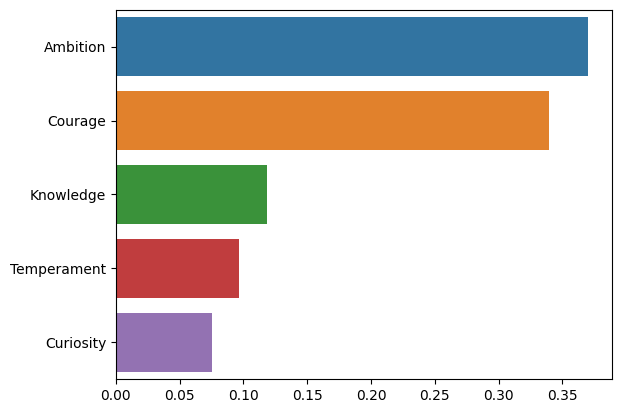

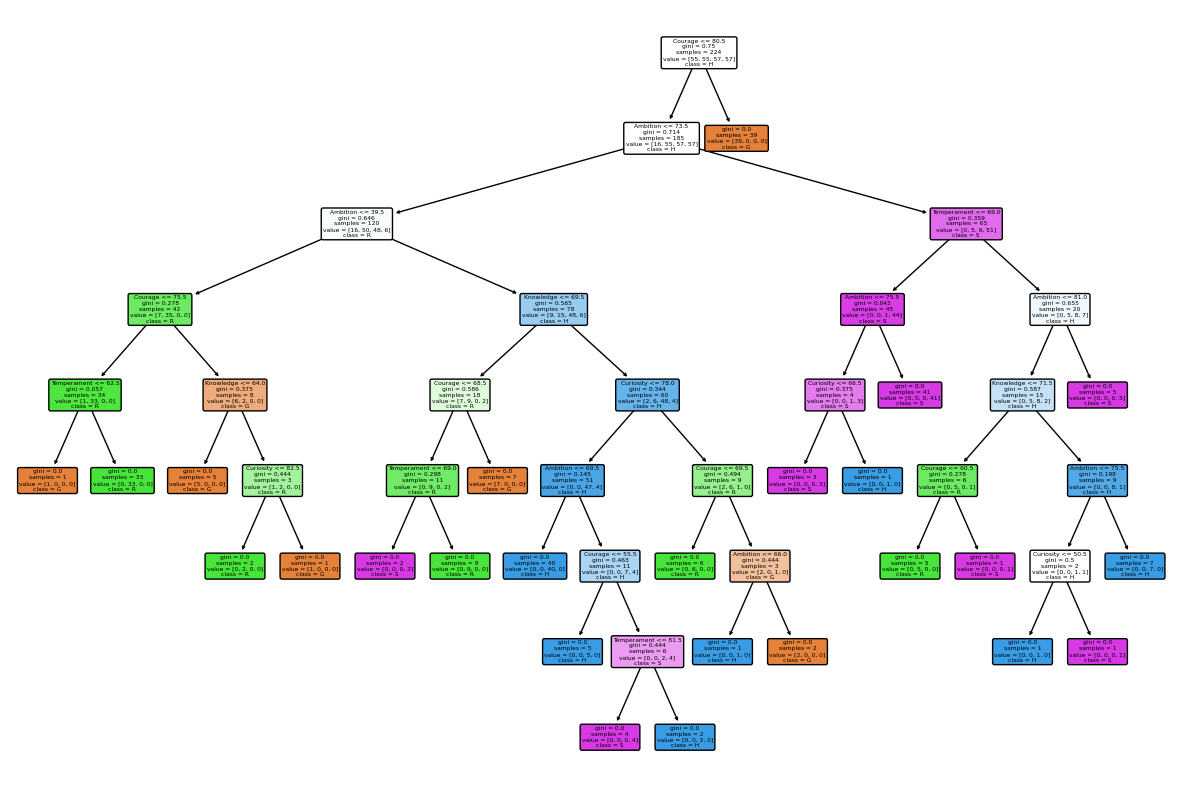

용기95, 지식70, 호기심75, 성격85, 욕심40인 학생의 기숙사 ->  G


In [7]:
import pandas as pd # 판다스 라이브러리 사용
import numpy as np # 넘파이 라이브러리 사용
from sklearn.model_selection import train_test_split # 학습 데이터 분할 라이브러리
from sklearn.metrics import accuracy_score #성능 평가 라이브러리
import matplotlib.pyplot as plt # 그래프 출력 라이브러리
from sklearn.tree import DecisionTreeClassifier# 의사 결정 트리 분류 라이브러리
from sklearn.tree import plot_tree # 의사 결정 트리 그래프 라이브러리
import seaborn as sns # 시본 그래프 라이브러리
# house.csv 파일을 다운로드
!wget -O house.csv "https://github.com/2022infotextbook/ai-basic/raw/main/2_ai_ml/house.csv"
df = pd.read_csv("house.csv") # house.csv 파일을 데이터 프레임으로 불러온다.
X = df.drop(columns=["House"]) # 데이터 전처리
y = df["House"]
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42) # 의사 결정 트리 모델 훈련
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # 예측 및 정확도 측정
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
features = pd.Series(model.feature_importances_, X.columns) # 분류에 영향을 끼친 속성 시각화
features_importance = features.sort_values(ascending=False)
sns.barplot(x=features_importance, y=features_importance.index)
plt.show()
plt.figure(figsize=(15, 10)) # 의사 결정 트리 그래프 표시
plot_tree(model, filled=True, feature_names=X.columns, class_names=["G", "R", "H", "S"], rounded=True)
plt.show()
new_data = np.array([[95, 70, 75, 85, 40 ]]) # 새로운 데이터에 대한 예측
prediction = model.predict(new_data)
print("용기95, 지식70, 호기심75, 성격85, 욕심40인 학생의 기숙사 -> ", prediction[0])